<a href="https://colab.research.google.com/github/MubinInamdar/Stock_Market_Prediction_and_Analysis/blob/main/Yahoo_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [ ]:
rf = pd.read_csv("/content/yahoo_stock.csv")

Dataset is in CSV format.

Uploading and reading the data in the notebook.

#Displaying the dataset

In [ ]:
rf.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
5,2015-11-28,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
6,2015-11-29,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
7,2015-11-30,2093.810059,2080.409912,2090.949951,2080.409912,4.275030e+09,2080.409912
8,2015-12-01,2103.370117,2082.929932,2082.929932,2102.629883,3.712120e+09,2102.629883
9,2015-12-02,2104.270020,2077.110107,2101.709961,2079.510010,3.950640e+09,2079.510010


**Date:** trading Date

**High and Low** refer to the maximum and minimum prices in a given time period.

**Open and close** are the prices at which a stock began and ended trading in the same period.

**Volume** is the total amount of trading activity

**Adj Close** Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.



In [ ]:
rf.shape

(1825, 7)

Dataset has 1825 rows and 7 columns.

In [ ]:
print(rf['Date'].min())
print(rf['Date'].max())

2015-11-23
2020-11-20


Data is from 23 november 2015 to 20 november 2020

In [ ]:
rf.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [ ]:
rf.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


#Checking the columns,non-null values and data types.

In [ ]:
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [ ]:
rf.nunique(axis=0)

Date         1825
High         1252
Low          1251
Open         1247
Close        1252
Volume       1258
Adj Close    1252
dtype: int64

#Checking null values present in which column and its count.

In [ ]:
rf.isnull().any()

Date         False
High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [ ]:
rf.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [ ]:
missing_percentage=rf.isnull().sum().sort_values(ascending=False)/len(rf)*100
missing_percentage

Date         0.0
High         0.0
Low          0.0
Open         0.0
Close        0.0
Volume       0.0
Adj Close    0.0
dtype: float64

#Setting index as date.

In [ ]:
rf.set_index("Date", drop=False, inplace=True)

In [ ]:
rf.head()

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2015-11-23,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107


#Addition of 1 columns namely year in the dataset.

In [ ]:
rf.Date = pd.to_datetime(rf.Date, format="%Y-%m-%d")
rf['year'] = rf.Date.dt.year

In [ ]:
rf.head()

,Date,High,Low,Open,Close,Volume,Adj Close,year
Date,,,,,,,,
2015-11-23,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,2015
2015-11-24,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,2015
2015-11-25,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,2015
2015-11-26,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,2015
2015-11-27,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,2015


#Plotting the graphs

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

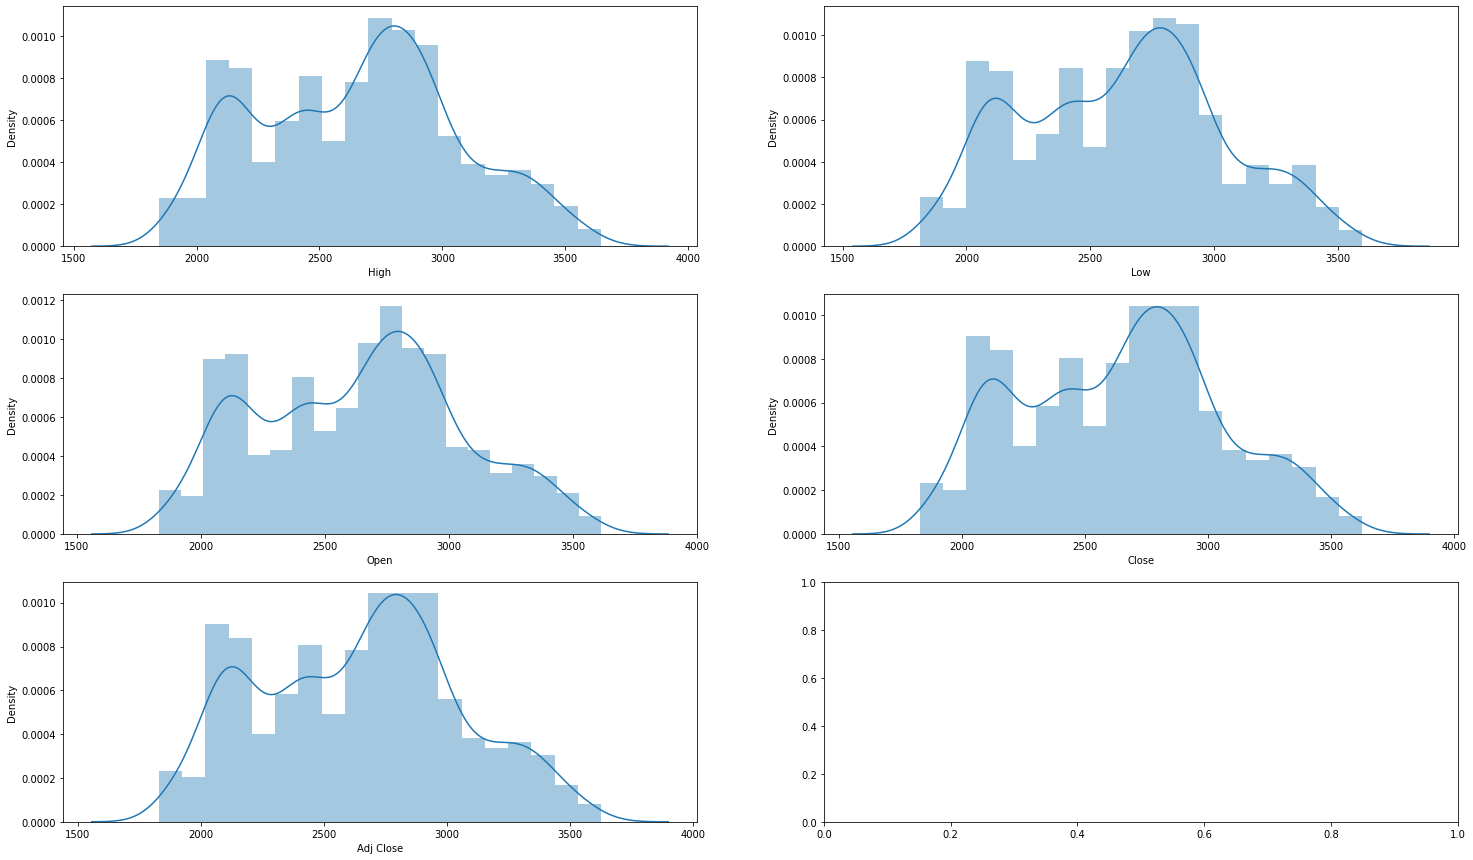

In [ ]:
fig, axis = plt.subplots(3, 2, figsize=(25, 15), sharex=False)

sns.distplot(rf['High'],ax=axis[0,0]);

sns.distplot(rf['Low'],ax=axis[0,1]);

sns.distplot(rf['Open'],ax=axis[1,0]);

sns.distplot(rf['Close'],ax=axis[1,1]);

sns.distplot(rf['Adj Close'],ax=axis[2,0]);

plt.show()

Text(0, 0.5, 'Open')

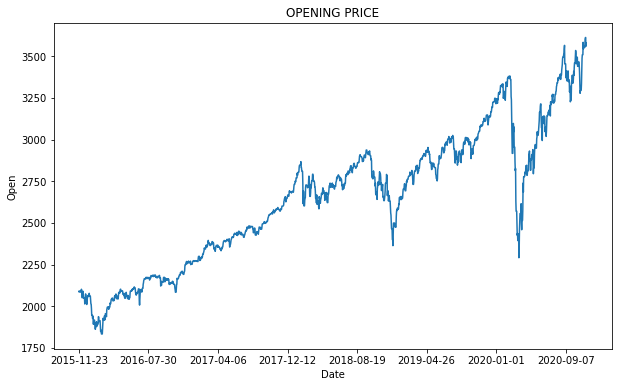

In [ ]:
rf['Open'].plot(figsize=(10,6), title="OPENING PRICE")
plt.ylabel('Open')

Text(0, 0.5, 'High')

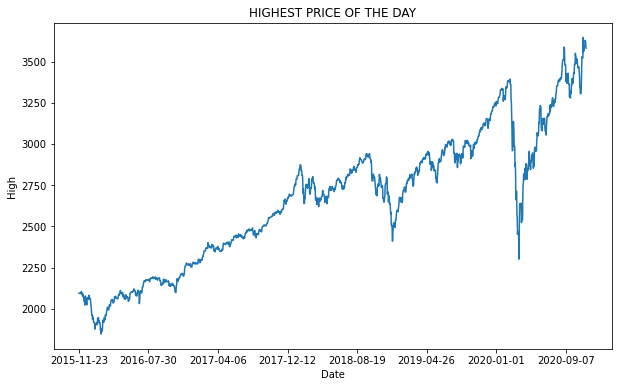

In [ ]:
rf['High'].plot(figsize=(10,6), title="HIGHEST PRICE OF THE DAY")
plt.ylabel('High')

Text(0, 0.5, 'Low')

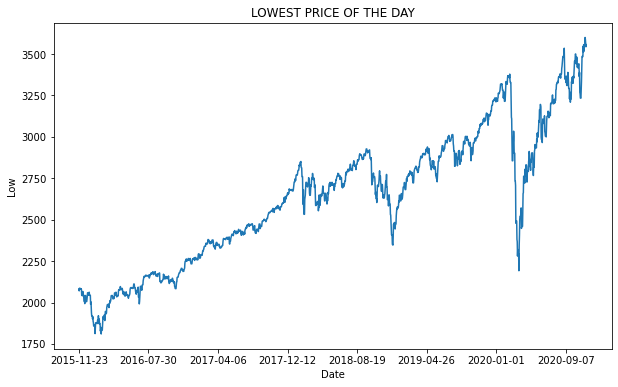

In [ ]:
rf['Low'].plot(figsize=(10,6), title="LOWEST PRICE OF THE DAY")
plt.ylabel('Low')

Text(0, 0.5, 'Close')

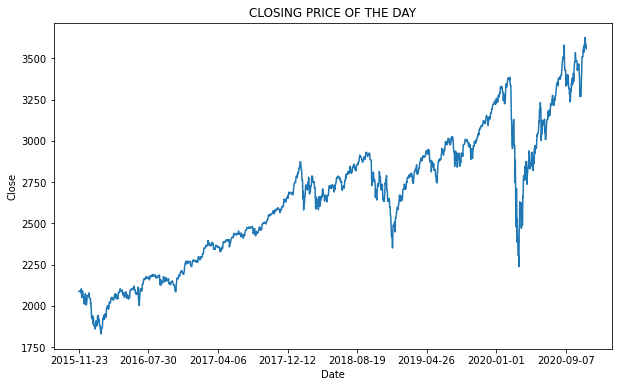

In [ ]:
rf['Close'].plot(figsize=(10,6), title="CLOSING PRICE OF THE DAY")
plt.ylabel('Close')

Text(0, 0.5, 'Adj Close')

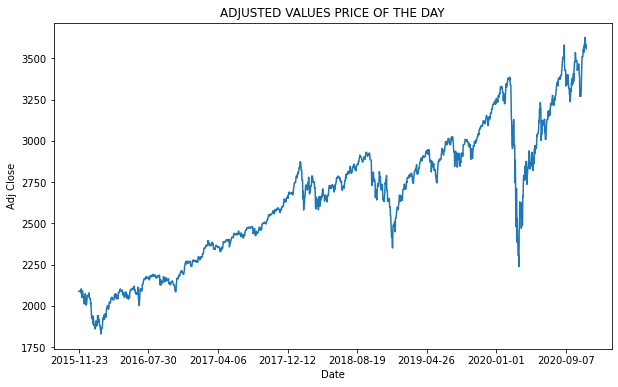

In [ ]:
rf['Adj Close'].plot(figsize=(10,6), title="ADJUSTED VALUES PRICE OF THE DAY")
plt.ylabel('Adj Close')

Text(0, 0.5, 'Volume')

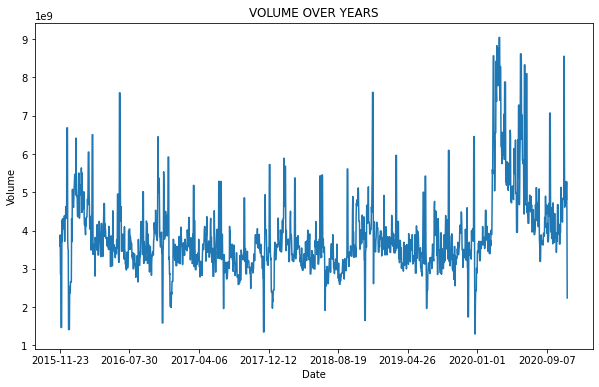

In [ ]:
rf['Volume'].plot(figsize=(10,6), title="VOLUME OVER YEARS")
plt.ylabel('Volume')

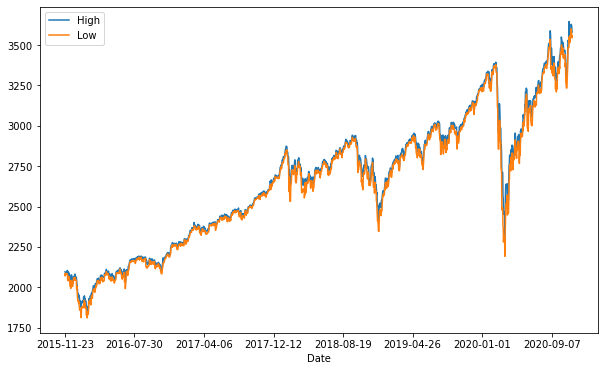

In [ ]:
rf[["High", "Low"]].plot(figsize=(10, 6))

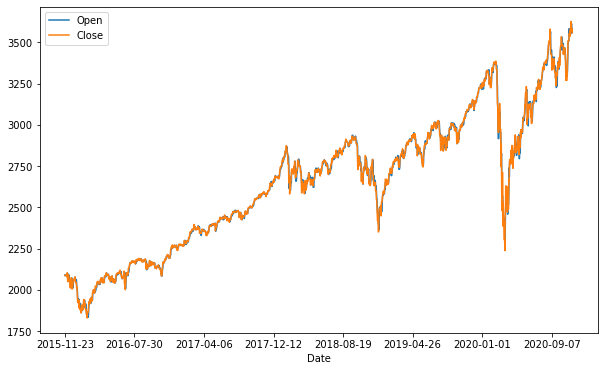

In [ ]:
rf[["Open", "Close"]].plot(figsize=(10, 6))

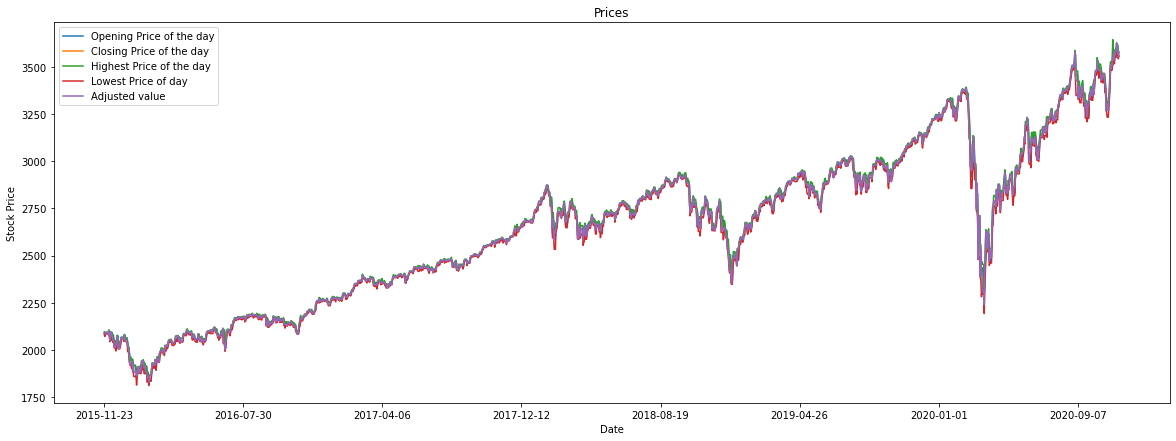

In [ ]:
plt.figure(figsize=(20,7));
rf['Open'].plot(label = 'Opening Price of the day')
rf['Close'].plot(label = 'Closing Price of the day')
rf['High'].plot(label= 'Highest Price of the day')
rf['Low'].plot(label= 'Lowest Price of day')
rf['Adj Close'].plot(label='Adjusted value')
plt.legend()
plt.title('Prices')
plt.ylabel("Stock Price")
plt.show()

There is no much difference between the prices as the graphs are overlapping each other.

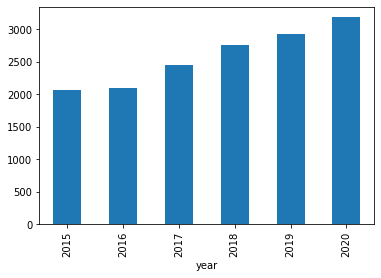

In [ ]:
rf.groupby('year')['High'].mean().plot.bar()

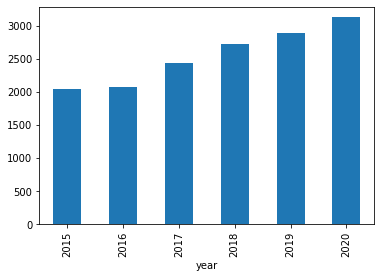

In [ ]:
rf.groupby('year')['Low'].mean().plot.bar()

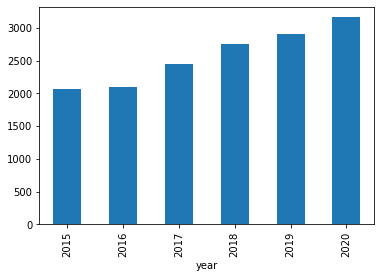

In [ ]:
rf.groupby('year')['Open'].mean().plot.bar()

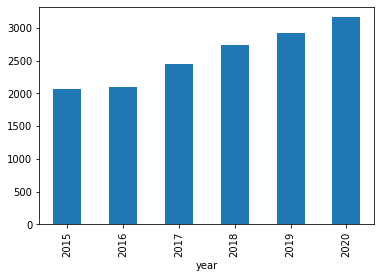

In [ ]:
rf.groupby('year')['Close'].mean().plot.bar()

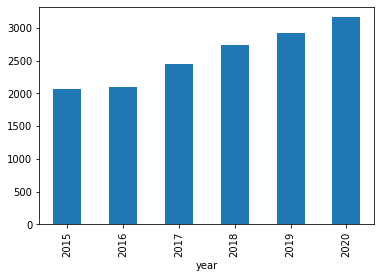

In [ ]:
rf.groupby('year')['Adj Close'].mean().plot.bar()

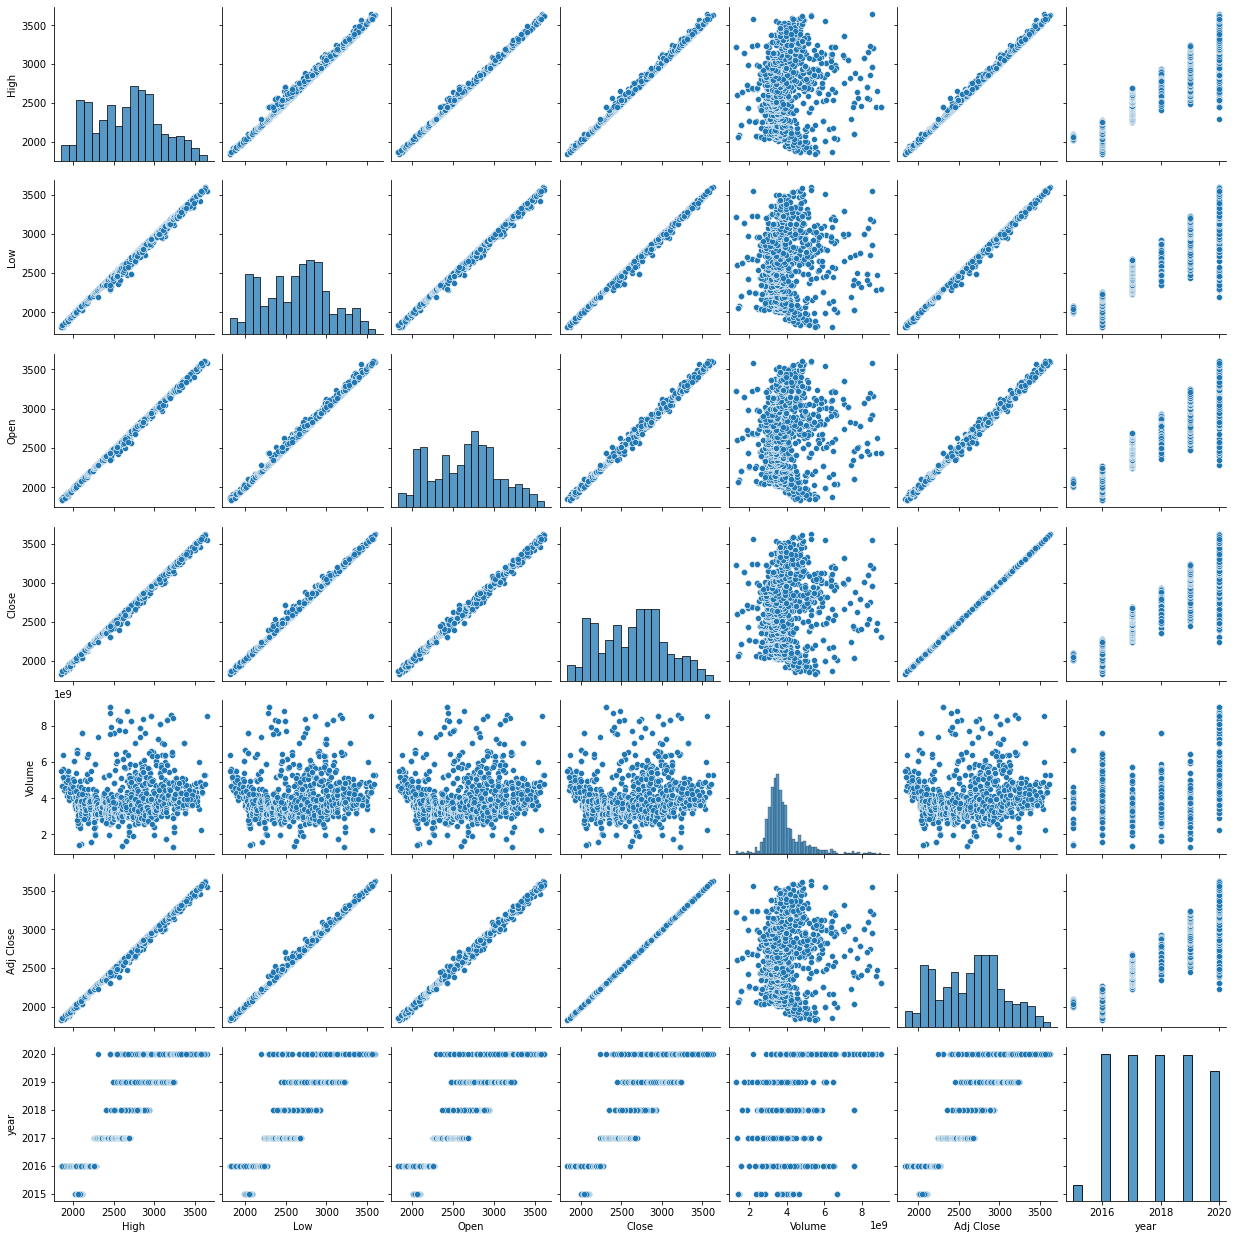

In [ ]:
sns.pairplot(rf)

Some variables show linear relation with each other.

Therefore, they may have positive correlation.

In [ ]:
rf.corr()

,High,Low,Open,Close,Volume,Adj Close,year
High,1.000000,0.998154,0.999328,0.998958,0.084212,0.998958,0.914877
Low,0.998154,1.000000,0.998794,0.999020,0.044557,0.999020,0.900907
Open,0.999328,0.998794,1.000000,0.998344,0.069729,0.998344,0.908504
Close,0.998958,0.999020,0.998344,1.000000,0.063401,1.000000,0.908699
Volume,0.084212,0.044557,0.069729,0.063401,1.000000,0.063401,0.274010
Adj Close,0.998958,0.999020,0.998344,1.000000,0.063401,1.000000,0.908699
year,0.914877,0.900907,0.908504,0.908699,0.274010,0.908699,1.000000


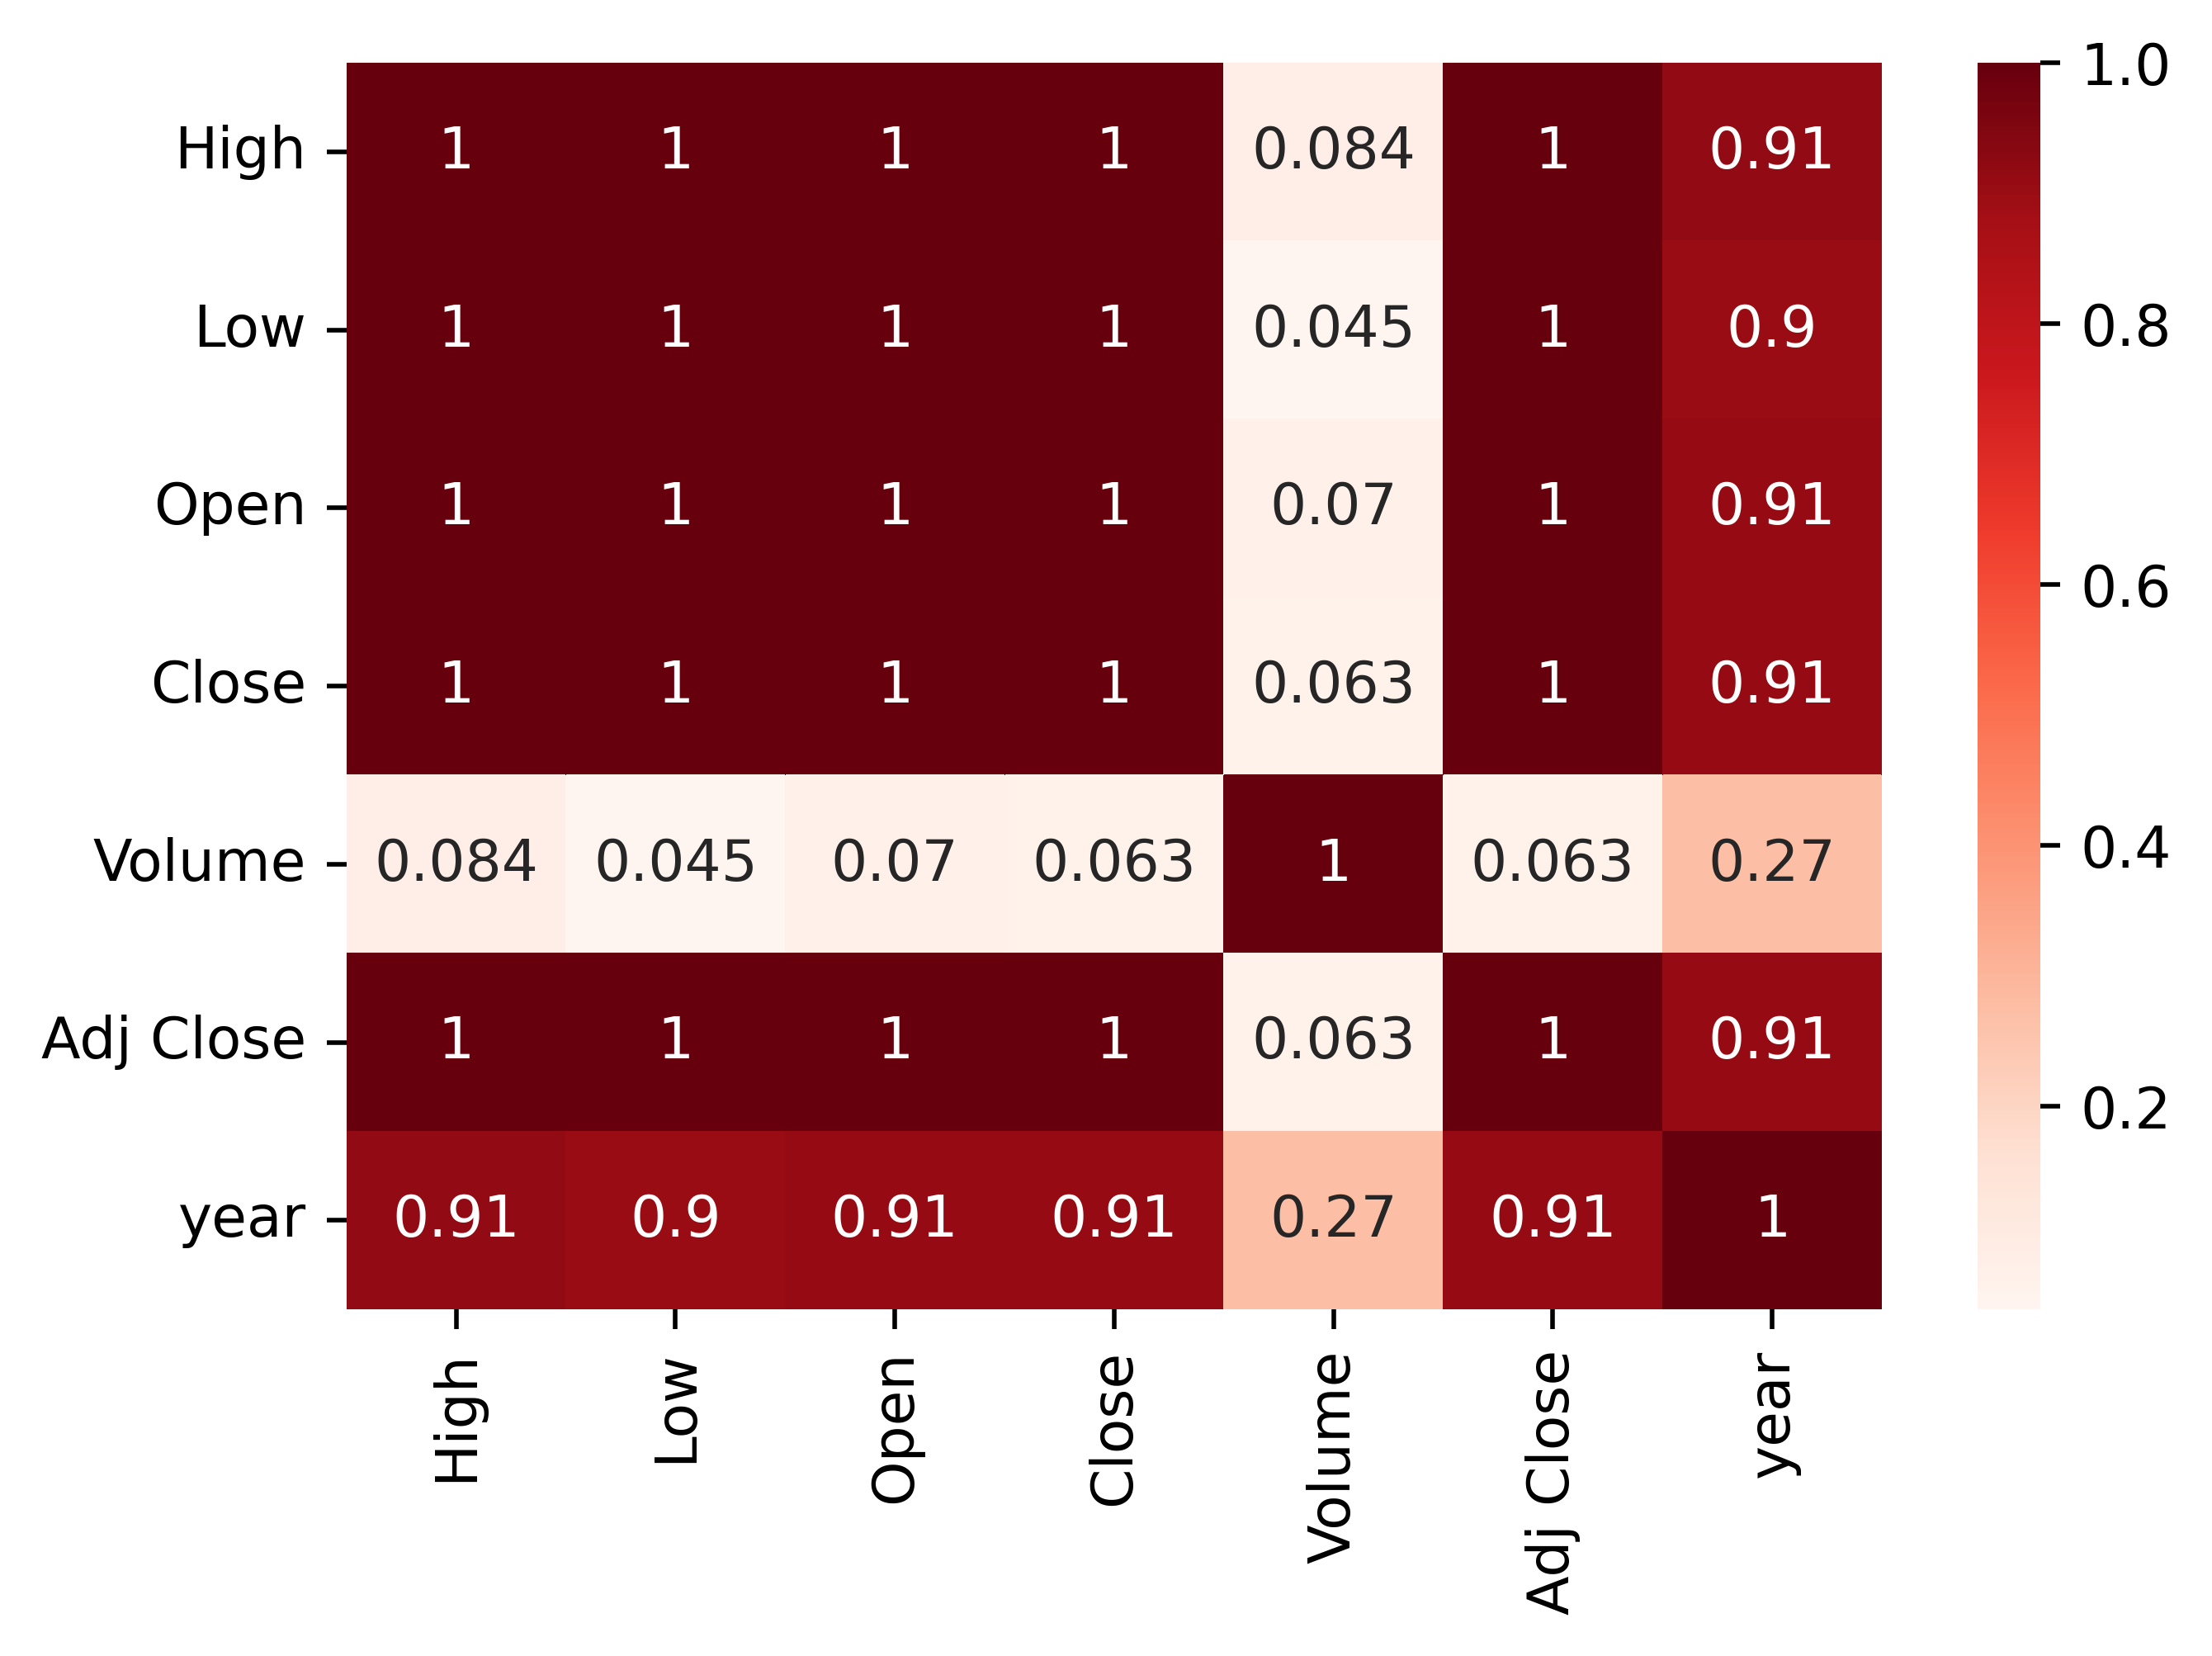

In [ ]:
plt.figure(dpi=500)
sns.heatmap(rf.corr(),cmap="Reds",annot=True)

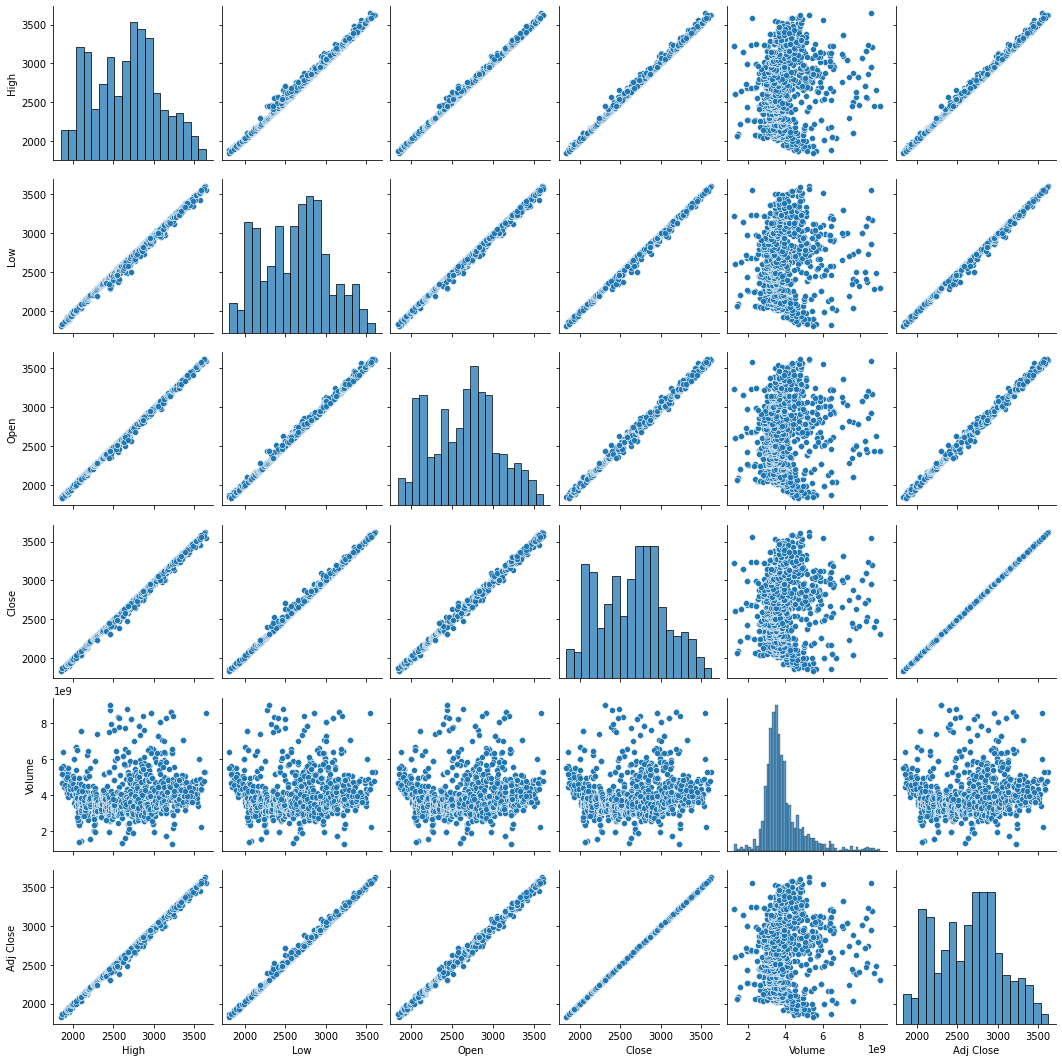

In [ ]:
sns.pairplot(rf,vars = rf.columns[1:7])

In [ ]:
rf[rf.columns[0:7]].corr()[0:7]

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.998154,0.999328,0.998958,0.084212,0.998958
Low,0.998154,1.000000,0.998794,0.999020,0.044557,0.999020
Open,0.999328,0.998794,1.000000,0.998344,0.069729,0.998344
Close,0.998958,0.999020,0.998344,1.000000,0.063401,1.000000
Volume,0.084212,0.044557,0.069729,0.063401,1.000000,0.063401
Adj Close,0.998958,0.999020,0.998344,1.000000,0.063401,1.000000


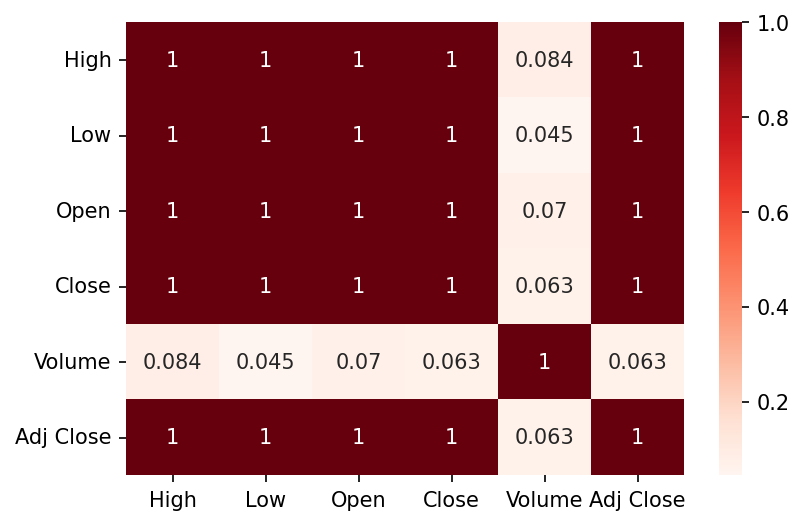

In [ ]:
plt.figure(dpi=150)
sns.heatmap(rf[rf.columns[0:7]].corr()[0:7],cmap="Reds",annot=True)

There is positve correlation between two variables.

Many have the highest correlation i.e 1.

#Decomposition

In [ ]:
rf=rf.drop(['Date','year'],axis=1)

In [ ]:
rf

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
...,...,...,...,...,...,...
2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
help(seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, freq=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages
    
    Parameters
    ----------
    x : array-like
        Time series. If 2d, individual series are in columns.
    model : str {"additive", "multiplicative"}
        Type of seasonal component. Abbreviations are accepted.
    filt : array-like
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by two_sided.
    freq : int, optional
        Frequency of the series. Must be used if x is not a pandas object.
        Overrides default periodicity of x if x is a pandas
        object with a timeseries index.
    two_sided : bool
        The moving average method used in filtering.
        If True (default), a centered moving average is computed using the filt.
        If F

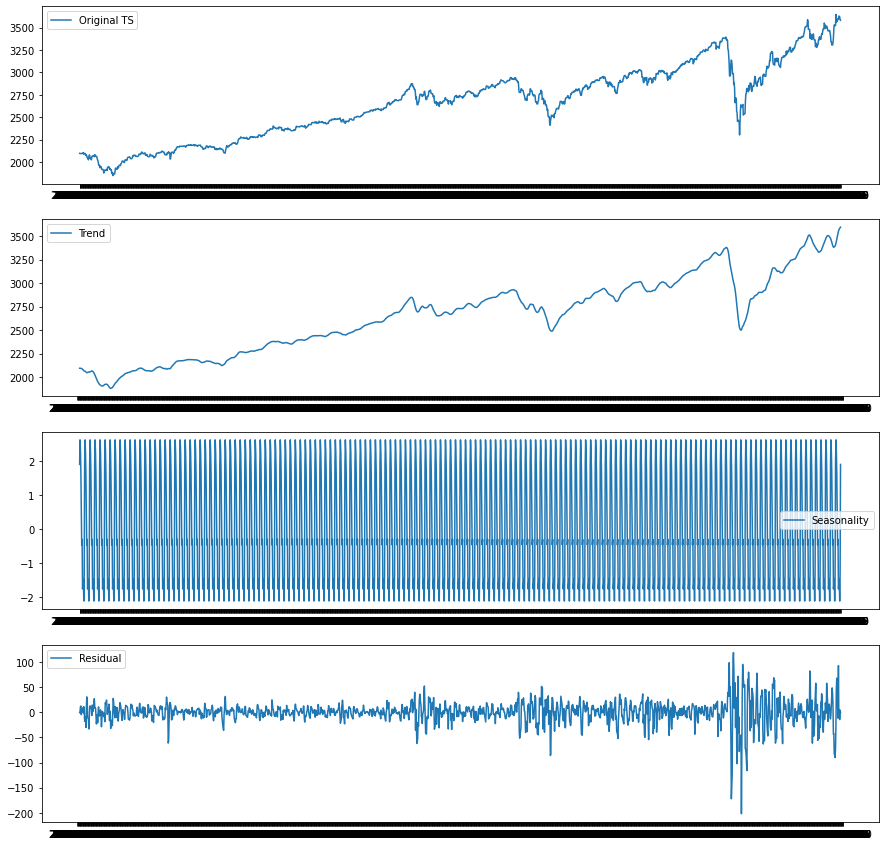

In [ ]:
decompose_add=seasonal_decompose(rf['High'], model='additive',freq=12)
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(rf['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_add.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_add.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_add.resid, label='Residual')
plt.legend(loc='best')
plt.show()

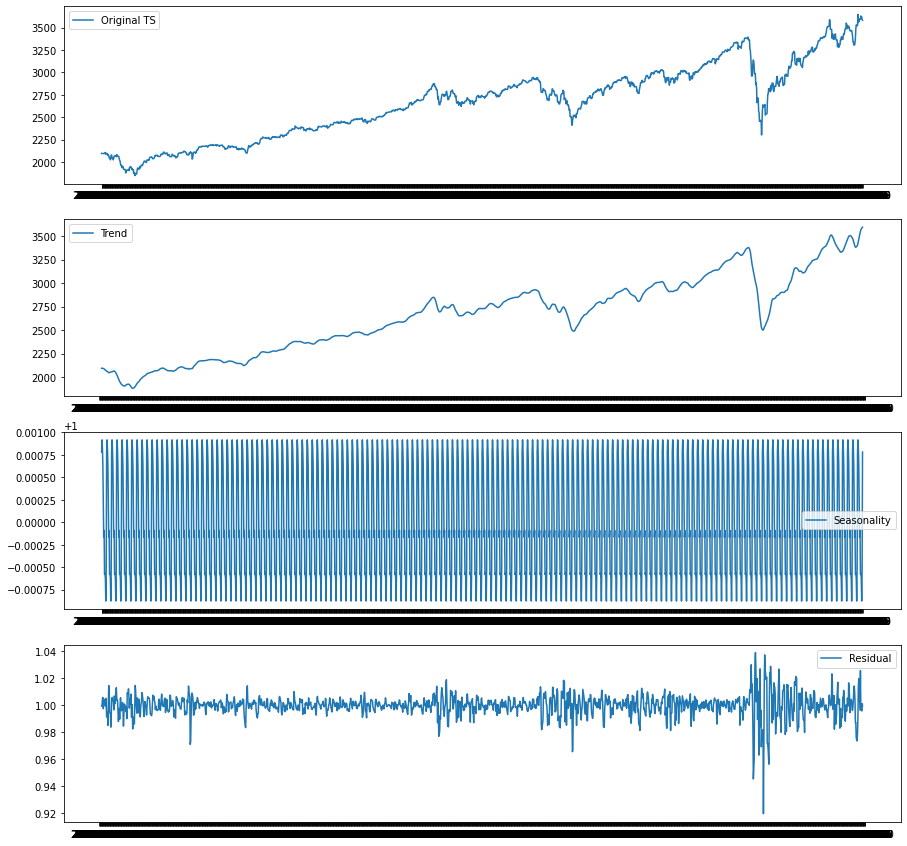

In [ ]:
decompose_mul=seasonal_decompose(rf['High'], model='multiplicative',freq=12)
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(rf['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_mul.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_mul.seasonal,label='Seasonality')

plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_mul.resid, label='Residual')
plt.legend(loc='best')
plt.show()

#Modeling
1st comparison, model with 7 different window length.

2nd comparison, model with more layers, neurons and epochs.

3rd comparison, model with regularization.

4th comparison, model using SimpleRNN vs LSTM

In [ ]:
from numpy import log
import math

Defining new dataset. In this dataset we omitted last 4 rows.

In [ ]:
new_rf=rf['High'].iloc[:-4]

In [ ]:
new_rf

Date
2015-11-23    2095.610107
2015-11-24    2094.120117
2015-11-25    2093.000000
2015-11-26    2093.000000
2015-11-27    2093.290039
                 ...     
2020-11-12    3569.020020
2020-11-13    3593.659912
2020-11-14    3593.659912
2020-11-15    3593.659912
2020-11-16    3628.510010
Name: High, Length: 1821, dtype: float64

We define the length of the training set as 80% of the total records

In [ ]:
train_len = math.ceil(len(new_rf)*0.8)
train_len

1457

Using 10 as a random window to be used in the model to build:

In [ ]:
window=10

The following lines create the training sets, as we now the first row takes the first 10 time steps and then the second row takes time steps shifted in one and so on and so forth:

In [ ]:
train_data = new_rf[0:train_len]
#print(train_data)
X_train=[]
Y_train=[]

for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    Y_train.append(train_data[i])
    """print(i)
    print(X_train)
    print(Y_train)
    if(i==13):
        break
   """

In [ ]:
X_train, Y_train= np.array(X_train), np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

(1447, 10)
(1447,)


Reshaping the training set to (number of records-window, number of time steps, 1):

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape,Y_train.shape

((1447, 10, 1), (1447,))

In [ ]:
X_train

array([[[2095.61010742],
        [2094.12011719],
        [2093.        ],
        ...,
        [2093.81005859],
        [2103.37011719],
        [2104.27001953]],

       [[2094.12011719],
        [2093.        ],
        [2093.        ],
        ...,
        [2103.37011719],
        [2104.27001953],
        [2085.        ]],

       [[2093.        ],
        [2093.        ],
        [2093.29003906],
        ...,
        [2104.27001953],
        [2085.        ],
        [2093.84008789]],

       ...,

       [[3078.34008789],
        [3097.77001953],
        [3093.09008789],
        ...,
        [3098.06005859],
        [3098.19995117],
        [3120.45996094]],

       [[3097.77001953],
        [3093.09008789],
        [3093.09008789],
        ...,
        [3098.19995117],
        [3120.45996094],
        [3120.45996094]],

       [[3093.09008789],
        [3093.09008789],
        [3093.09008789],
        ...,
        [3120.45996094],
        [3120.45996094],
        [3120.45996094]]

The following is the first model to be used, this is relatively simple with one LSTM layer with relu activation function and one hidden fully connected layer, the optimizer used is Adam, number of epochs=10, batch_size=10 and loss function=Mean squared error:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
model=Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))   #last layer so neuron=1
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________


Creating the validation set using same logic as training:

In [ ]:
test_data = new_rf[train_len-window:]
#print(test_data)
X_val=[]
Y_val=[] 

for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])
    """print(i)
    print(X_val)
    print(Y_val)
    if(i==11):
        break
   """

In [ ]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
print(X_val.shape)
print(Y_val.shape)

(364, 10)
(364,)


In [ ]:
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
X_val.shape, Y_val.shape

((364, 10, 1), (364,))

Now that our validation set has the correct shape we can use it in the model to predict the next value.

In [ ]:
prediction = model.predict(X_val)

Checking the length of prediction and actual values.



In [ ]:
len(prediction), len(Y_val)

(364, 364)

As our prediction and actual values have the same shape we can use these sets to compute the error metrics, in this case we will use RMSE.

In [ ]:
from sklearn.metrics import mean_squared_error

lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Train rmse: 19.914242649249754
Validation rmse: 77.2144546577674


In [ ]:
valid = pd.DataFrame(new_rf[train_len:])
valid['Predictions']=lstm_valid_pred
valid

,High,Predictions
Date,,
2019-11-19,3127.639893,3123.462646
2019-11-20,3118.969971,3127.556641
2019-11-21,3110.110107,3123.221924
2019-11-22,3112.870117,3117.382812
2019-11-23,3112.870117,3120.923584
...,...,...
2020-11-12,3569.020020,3553.769043
2020-11-13,3593.659912,3561.587158
2020-11-14,3593.659912,3584.997559


Below we can see a simple plot showing both curves, in which clearly there is a difference and a sort of shift to the right or delay in the prediction curve.

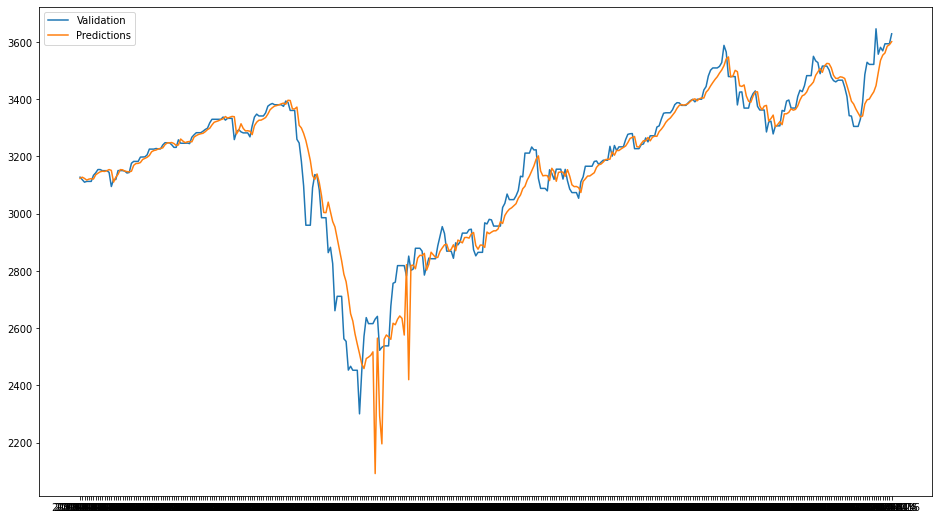

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

In [ ]:
train = pd.DataFrame(new_rf[0:train_len-window])
train['Predictions']=lstm_train_pred
train

,High,Predictions
Date,,
2015-11-23,2095.610107,2107.654297
2015-11-24,2094.120117,2096.902100
2015-11-25,2093.000000,2101.393799
2015-11-26,2093.000000,2104.077637
2015-11-27,2093.290039,2102.894287
...,...,...
2019-11-04,3085.199951,3104.455322
2019-11-05,3083.949951,3101.942139
2019-11-06,3078.340088,3117.223633


Plotting the training data and the predictions done on train data.

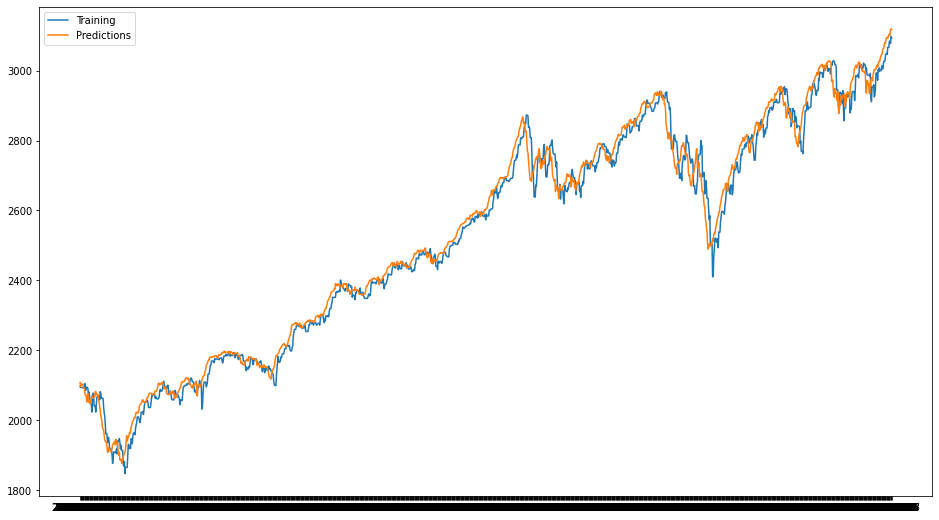

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(train[['High','Predictions']])
plt.legend(['Training','Predictions'])
plt.show()

Finally, the plot showing training, validation and prediction curves:

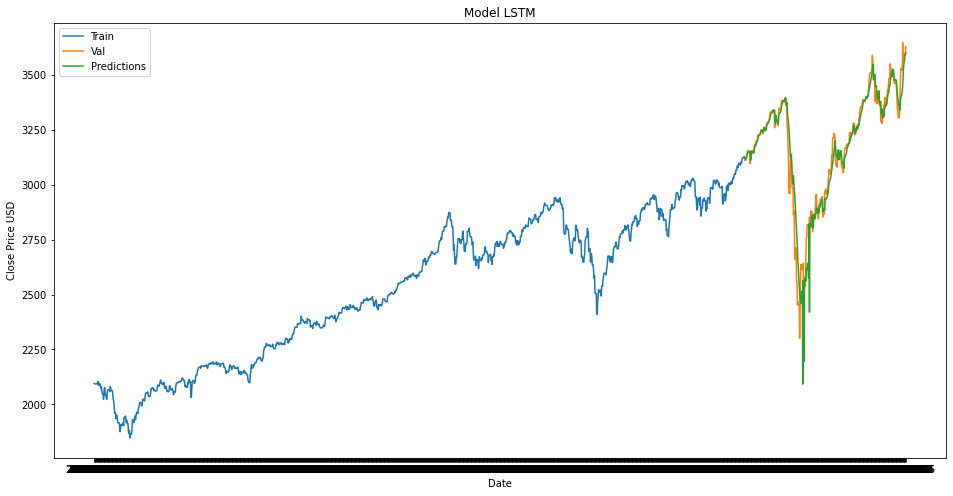

In [ ]:
train = new_rf[:train_len]
valid = pd.DataFrame(new_rf[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

#1st comparison:

In order to tackle down this 'shift' and thus reduce the error we have to find the suit window number, for this we will compute the RMSE for the following number of windows: 5,8,10,15,20,30,40. Then compare results and find the lowest.

In [ ]:
train_error=[]
val_error=[]

window_number=[5,8,10,15,20,30,40]
for i in window_number:
    
    train_data = new_rf[0:train_len]

    X_train=[]
    Y_train=[]

    for i in range(window, len(train_data)):
        X_train.append(train_data[i-window:i])
        Y_train.append(train_data[i])

    X_train, Y_train= np.array(X_train), np.array(Y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    
    test_data = new_rf[train_len-window:]

    X_val=[]
    Y_val=[] 

    for i in range(window, len(test_data)):
        X_val.append(test_data[i-window:i])
        Y_val.append(test_data[i])

    X_val, Y_val = np.array(X_val), np.array(Y_val)
    X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
    
    model=Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)
    
    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    train_error.append(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
    val_error.append(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

In [ ]:
train_error

[28.23373858171515,
 31.897236477129812,
 23.55886608006101,
 28.824803710004694,
 19.20830727420866,
 38.28951853755388,
 18.191066299877566]

In [ ]:
val_error

[74.18914329711394,
 82.54889331239261,
 82.22014627340921,
 79.39249473048234,
 57.898115932057195,
 91.6223462317647,
 64.15943805934941]

The following table shows the RMSE of train and validation sets for each of the 7 windows:

In [ ]:
pd.concat([pd.DataFrame(train_error,columns=['train_error']),
           pd.DataFrame(val_error,columns=['val_error']),
           pd.DataFrame([5,8,10,15,20,30,40],columns=['window'])], axis=1).set_index('window')

,train_error,val_error
window,,
5,28.233739,74.189143
8,31.897236,82.548893
10,23.558866,82.220146
15,28.824804,79.392495
20,19.208307,57.898116
30,38.289519,91.622346
40,18.191066,64.159438


Having window=10 the lowest RMSE for validation set. Thus this number was chosen as the best predictor. 

There are still more hyperparameters to tune in order to improve the accuracy.

#2nd comparison:

One efficient way to improve the accuracy is by simply increasing the complexity of the model and this can be achieved adding more layers and more LSTM cells. Therefore in this step we will build a multilayered model and compare its performance with the prior.
Firstly, let's create again the training and validation sets for 10 windows to be used.

In [ ]:
window=10

train_data = new_rf[0:train_len]
X_train=[]
Y_train=[]
for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    Y_train.append(train_data[i])

X_train, Y_train= np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

test_data = new_rf[train_len-window:]
X_val=[]
Y_val=[] 
for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])
    
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

The following is the architecture of the model to be used (2 LSTM layers and 2 hidden fully-connected layers), the optimizer is more specific and the number of epochs was increased to 100:

In [ ]:
import tensorflow as tf
model=Sequential()
model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False,activation='relu'))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(1))
opt1= tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=opt1)
model.summary()
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_16 (Dense)            (None, 100)               5100      
                                                                 
 dense_17 (Dense)            (None, 25)                2525      
                                                                 
 dense_18 (Dense)            (None, 1)                 26        
                                                                 
Total params: 38,251
Trainable params: 38,251
Non-trainable params: 0
_________________________________________________________________


In the summary above we can see that the total parameters of this new model is three times or even more than the prior which is indicative of the complexity and the time it takes to train.

In [ ]:
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Train rmse: 29.91763211107407
Validation rmse: 85.99056931228989


In [ ]:
valid = pd.DataFrame(new_rf[train_len:])
valid['Predictions']=lstm_valid_pred
valid

,High,Predictions
Date,,
2019-11-19,3127.639893,3103.974121
2019-11-20,3118.969971,3105.486816
2019-11-21,3110.110107,3110.851074
2019-11-22,3112.870117,3112.996094
2019-11-23,3112.870117,3113.563721
...,...,...
2020-11-12,3569.020020,3514.879883
2020-11-13,3593.659912,3527.182861
2020-11-14,3593.659912,3536.634766


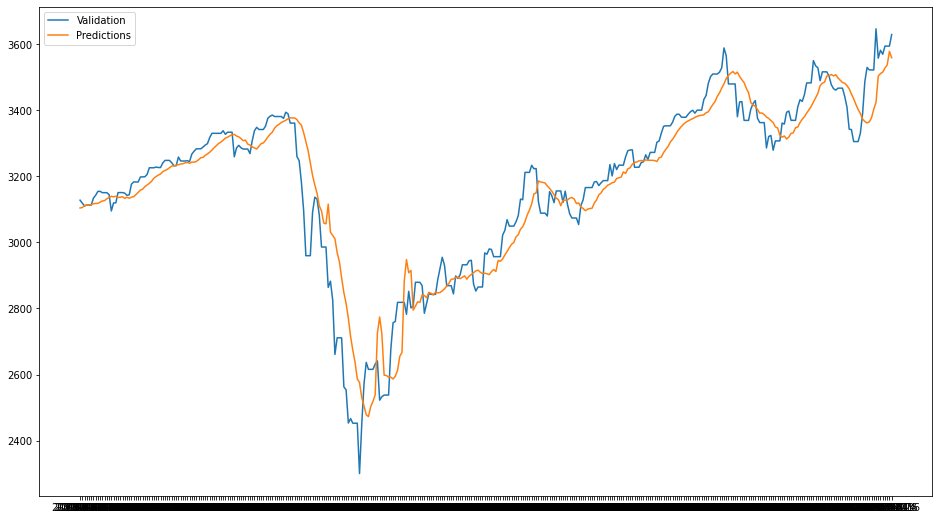

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

Despite the fact that error metrics were lower than before in the plot above still can see a gap between the actual and predicted values.

In [ ]:
train = pd.DataFrame(new_rf[0:train_len-window])
train['Predictions']=lstm_train_pred
train

,High,Predictions
Date,,
2015-11-23,2095.610107,2104.578369
2015-11-24,2094.120117,2104.246582
2015-11-25,2093.000000,2105.516602
2015-11-26,2093.000000,2103.328369
2015-11-27,2093.290039,2104.621094
...,...,...
2019-11-04,3085.199951,3089.077148
2019-11-05,3083.949951,3090.618896
2019-11-06,3078.340088,3094.679199


Plotting the training data and the predictions done on train data.

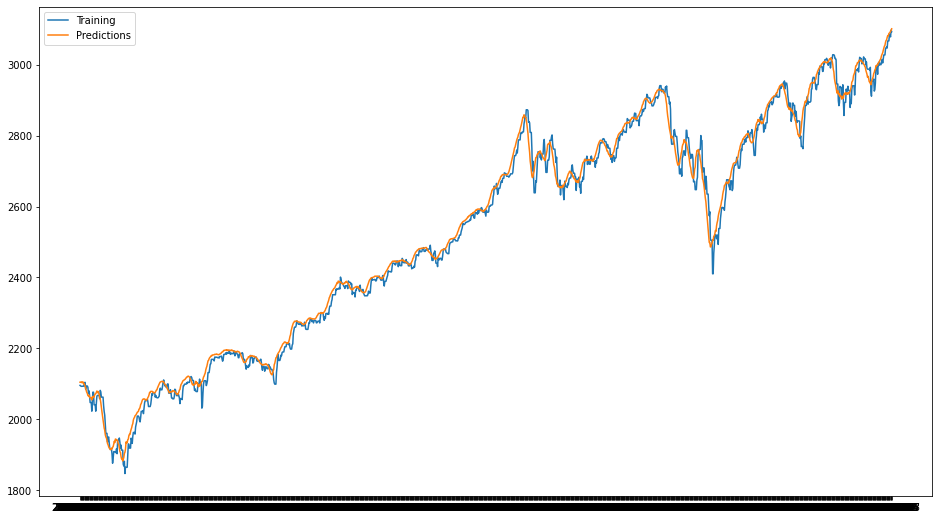

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(train[['High','Predictions']])
plt.legend(['Training','Predictions'])
plt.show()

In order to better vizualize this I will run 10 times the same model and compute the errors in each one.

In [ ]:
r1=[]
r2=[]

for i in range(0,10):
    model=Sequential()
    model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(LSTM(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

In [ ]:
import statistics
print(r1)
print("Mean: ",statistics.mean(r1))
print("Std Dev: ",statistics.stdev(r1))

[21.39, 27.76, 21.59, 15.9, 40.63, 32.66, 17.01, 30.85, 27.71, 21.47]
Mean:  25.697
Std Dev:  7.681650647267595


In [ ]:
print(r2)
print("Mean: ",statistics.mean(r2))
print("Std Dev: ",statistics.stdev(r2))

[58.59, 76.68, 45.35, 41.28, 83.68, 87.36, 45.53, 63.01, 70.24, 57.36]
Mean:  62.908
Std Dev:  16.33090784711956


#3rd comparison:
As the validation errors were still considerably higher than training we think one reason could be due to overfitting and for this problem we have to add regularization to the model chosen by using Dropout after Fully Connected layers and LSTM cells. In this step we will run a regularized model again 10 times in order to see the variation in the results:

In [ ]:
r1=[]
r2=[]

for i in range(0,10):
    model=Sequential()
    model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1),recurrent_dropout=0.2))
    model.add(LSTM(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

In [ ]:
print(r1)
print("Mean: ",statistics.mean(r1))
print("Std Dev: ",statistics.stdev(r1))

[73.27, 118.02, 75.15, 76.63, 33.42, 49.95, 112.42, 62.09, 106.04, 34.53]
Mean:  74.152
Std Dev:  30.502873380133295


In [ ]:
print(r2)
print("Mean: ",statistics.mean(r2))
print("Std Dev: ",statistics.stdev(r2))

[114.03, 159.74, 122.22, 130.99, 90.45, 104.57, 158.52, 108.36, 158.73, 90.31]
Mean:  123.792
Std Dev:  27.302626572873496


We can see above how these values either training or validation are higher than with dropout, which is definitely not good.

#4th comparison:
Until now every model built does not offer us a good accuracy, as we are dealing with the budget of a company this results can lead to a completely wrong decision, but there is still a room of improvement and different approaches must be taken. We were forgeting the simplest type of RNN which is known for being more affected by vanishing gradient, however for our dataset it worked as follows (Again the model will be run 10 times):

In [ ]:
from keras.layers import SimpleRNN

In [ ]:
r1=[]
r2=[]

for i in range(0,10):
    model=Sequential()
    model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

In [ ]:
print(r1)
print("Mean: ",statistics.mean(r1))
print("Std Dev: ",statistics.stdev(r1))

[14.63, 15.9, 14.2, 22.09, 22.39, 17.35, 14.87, 21.03, 15.56, 14.14]
Mean:  17.216
Std Dev:  3.338563230559584


In [ ]:
print(r2)
print("Mean: ",statistics.mean(r2))
print("Std Dev: ",statistics.stdev(r2))

[37.45, 38.77, 37.19, 42.46, 43.45, 39.09, 37.95, 42.24, 38.01, 37.4]
Mean:  39.401
Std Dev:  2.381546882922014


In [ ]:
valid = pd.DataFrame(new_rf[train_len:])
valid['Predictions']=lstm_valid_pred
valid

,High,Predictions
Date,,
2019-11-19,3127.639893,3122.320801
2019-11-20,3118.969971,3125.413330
2019-11-21,3110.110107,3116.236328
2019-11-22,3112.870117,3107.145508
2019-11-23,3112.870117,3109.658691
...,...,...
2020-11-12,3569.020020,3592.259521
2020-11-13,3593.659912,3553.599121
2020-11-14,3593.659912,3593.358154


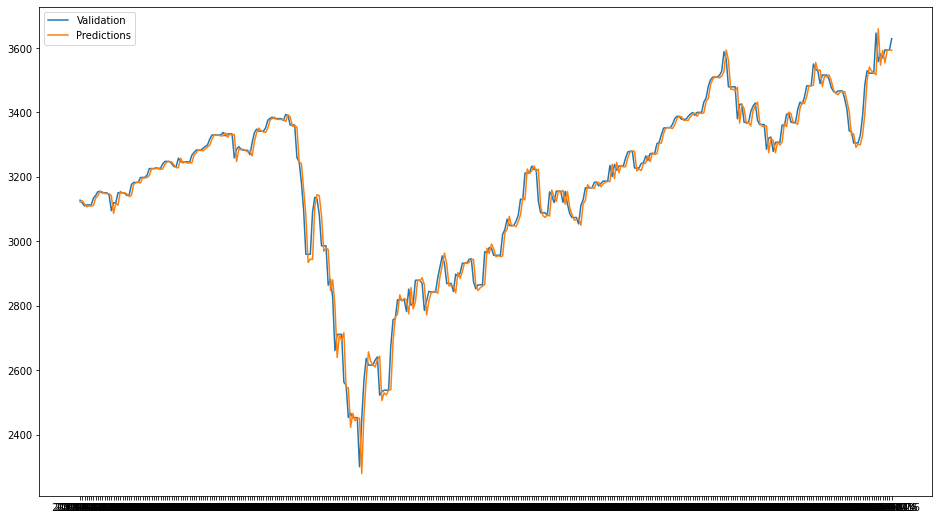

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

The gap in the prediction and validation is lesser compared to above comparisons in simple RNN.

In [ ]:
train = pd.DataFrame(new_rf[0:train_len-window])
train['Predictions']=lstm_train_pred
train

,High,Predictions
Date,,
2015-11-23,2095.610107,2103.580811
2015-11-24,2094.120117,2082.665771
2015-11-25,2093.000000,2093.609619
2015-11-26,2093.000000,2090.668457
2015-11-27,2093.290039,2093.934326
...,...,...
2019-11-04,3085.199951,3095.062012
2019-11-05,3083.949951,3097.424072
2019-11-06,3078.340088,3120.259277


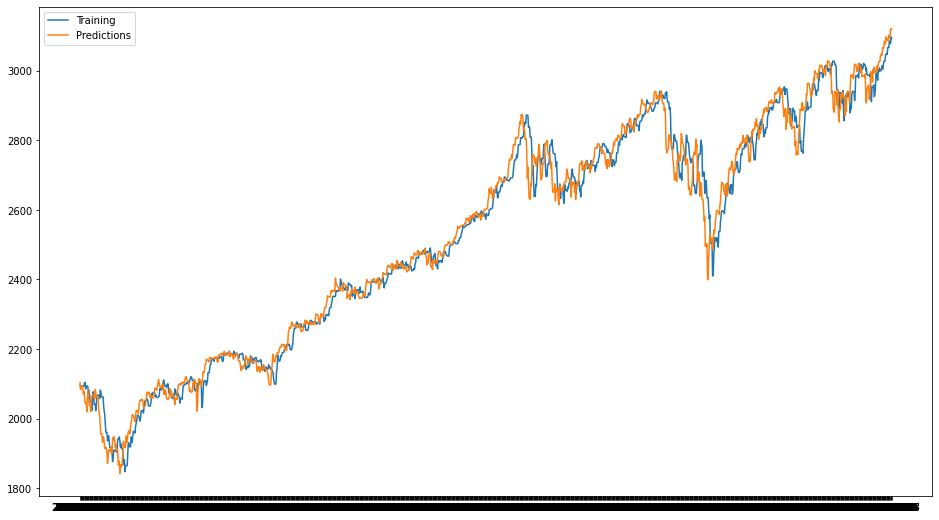

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(train[['High','Predictions']])
plt.legend(['Training','Predictions'])
plt.show()

Clearly, the gap was reduced significantly and the predicted curve even responded quickly to the 'high frequencies' or a.k.a. ripple in the actual curve. As this model corresponds to the best one we will continue working with this.

#Predicting 'future' values:

As we have values until 16-11-2020 we can predict the next one using the model built and compare the outcome with the actual value saved in the original dataframe 'df':

In [ ]:
last_10_days=new_rf[-10:].values
X_test=[]
X_test.append(last_10_days)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
print(pred_price)

[[3629.3716]]


Now, let's find the corresponding actual value in df:

In [ ]:
rf['High'].iloc[-4]

3623.110107421875

The difference is less and the model seems to be working very good.


In [ ]:
rf['High'].iloc[-4]-pred_price

array([[-6.2614746]], dtype=float32)

Predicting 4 future values:

In [ ]:
rf.High.tail(14)

Date
2020-11-07    3521.580078
2020-11-08    3521.580078
2020-11-09    3645.989990
2020-11-10    3557.219971
2020-11-11    3581.159912
2020-11-12    3569.020020
2020-11-13    3593.659912
2020-11-14    3593.659912
2020-11-15    3593.659912
2020-11-16    3628.510010
2020-11-17    3623.110107
2020-11-18    3619.090088
2020-11-19    3585.219971
2020-11-20    3581.229980
Name: High, dtype: float64

Above, the last 4 values correspond to the actual values we want to predict, and the time steps used does not comprehend these rather will be used the predicted ones as we run the model.
As we predicted one value (pred_price) the time steps used to predict a new one will take the last 9 of new_df and pred_price, as follows:

In [ ]:
last_9_days=new_rf[-9:].values
X_test=[]
X_test=np.append(last_9_days,pred_price)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price2=model.predict(X_test)
print(pred_price2)

[[3625.527]]


let's see what was the actual value:

In [ ]:
rf['High'].iloc[-3]

3619.090087890625

This time the difference was:

In [ ]:
rf['High'].iloc[-3]-pred_price2

array([[-6.4370117]], dtype=float32)

To compute a new prediction let's use the same logic as before:

In [ ]:
last_8_days=new_rf[-8:].values
X_test=[]
X_test=np.append(last_8_days,pred_price)
X_test=np.append(X_test,pred_price2)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price3=model.predict(X_test)
print(pred_price3)

[[3627.3093]]


Actual value:

In [ ]:
rf['High'].iloc[-2]

3585.219970703125

Difference:

In [ ]:
rf['High'].iloc[-2]-pred_price3

array([[-42.089355]], dtype=float32)

In [ ]:
last_7_days=new_rf[-7:].values
X_test=[]
X_test=np.append(last_7_days, pred_price)
X_test=np.append(X_test, pred_price2)
X_test=np.append(X_test, pred_price3)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price4=model.predict(X_test)
print(pred_price4)

[[3624.4553]]


Actual value:

In [ ]:
rf['High'].iloc[-1]

3581.22998046875

Difference:

In [ ]:
rf['High'].iloc[-1]-pred_price4

array([[-43.22534]], dtype=float32)

Now, let's see the four actual and predicted future values:

In [ ]:
rf.High.iloc[-4], rf.High.iloc[-3], rf.High.iloc[-2], rf.High.iloc[-1]

(3623.110107421875, 3619.090087890625, 3585.219970703125, 3581.22998046875)

In [ ]:
pred_price, pred_price2, pred_price3, pred_price4

(array([[3629.3716]], dtype=float32),
 array([[3625.527]], dtype=float32),
 array([[3627.3093]], dtype=float32),
 array([[3624.4553]], dtype=float32))

The following code will help us visualize these values in a table and plot:

In [ ]:
actual_prices=np.array([rf.High.iloc[-4], rf.High.iloc[-3], rf.High.iloc[-2], rf.High.iloc[-1]])
pred_prices=np.array([float(pred_price),float(pred_price2),float(pred_price3),float(pred_price4)])

In [ ]:
actual_prices, pred_prices

(array([3623.11010742, 3619.09008789, 3585.2199707 , 3581.22998047]),
 array([3629.37158203, 3625.52709961, 3627.30932617, 3624.45532227]))

In [ ]:
data={'Actual values':[rf.High.iloc[-4],rf.High.iloc[-3],rf.High.iloc[-2],rf.High.iloc[-1]],
      'Predicted values':[float(pred_price),float(pred_price2),float(pred_price3),float(pred_price4)]}

pd.DataFrame(data, index=['2020-11-17','2020-11-18','2020-11-19','2020-11-20'])

,Actual values,Predicted values
2020-11-17,3623.110107,3629.371582
2020-11-18,3619.090088,3625.527100
2020-11-19,3585.219971,3627.309326
2020-11-20,3581.229980,3624.455322


[(3540.0, 3700.0)]

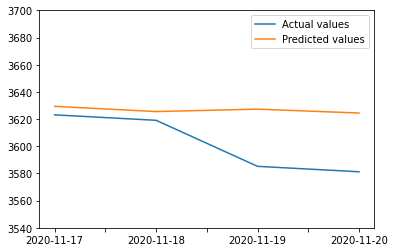

In [ ]:
fut=pd.DataFrame(data, index=['2020-11-17','2020-11-18','2020-11-19','2020-11-20']).plot()
fut.set(ylim=(3540,3700))

The plot above shows how sidetracked our prediction is from the actual values, this will impact our conclussion about complexity of model vs reliable forecasting, now will be computed the correspoding RMSE to see this difference quantified:

In [ ]:
np.round(np.sqrt(mean_squared_error(actual_prices, pred_prices)),2)

30.5